In [1]:
# 如下，因为这个遍历是需要类的定义的，这里用调入其他项目的方式来做，我用这个来调入，
import Ipynb_importer  # 我从网上下载的，放在D:\Anaconda3\DLLs目录中了，你可以自己搜索下载。
from  图的概念性质和实现 import Graph
from 图的概念性质和实现 import GraphAL
from 图的概念性质和实现 import KGraphAL

importing Jupyter notebook from 图的概念性质和实现.ipynb


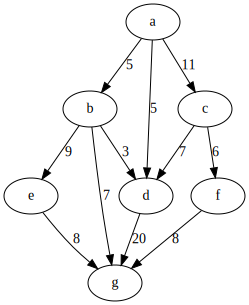

In [2]:
# 因为这个文件涉及到图的遍历，我这里先有一个图吧
graph = KGraphAL(["a", "b", "c", "d", "e", "f", "g"])
graph.add_edge("a", "b", 5)
graph.add_edge("a", "c", 11)
graph.add_edge("c", "f", 6)
graph.add_edge("f", "g", 8)
graph.add_edge("b", "e", 9)
graph.add_edge("b", "g", 7)
graph.add_edge("a", "d", 5)
graph.add_edge("d", "g", 20)
graph.add_edge("c", "d", 7)
graph.add_edge("b", "d", 3)
graph.add_edge("e", "g", 8)
graph.show()


# 深度优先遍历和宽度优先遍历总览

深度优先遍历 Depth-First Search  
- 首先访问顶点v，并将其标记为已经访问。
- 检查v的邻接顶点，从中选一个尚未访问的顶点，从它出发继续进行深度优先搜索（这是递归），不存在这种邻接顶点时回溯（邻接顶点可能排了一些顺序），文中没写的是，要用堆栈保存尚未访问的顶点
- 反复上述操作直到v出发可达的所有顶点都已访问（递归）
- 如果图中还存在未访问的顶点，则选出一个未访问的顶点，由它出发重复前述过程，直到图中所有顶点都已访问为止。

通过深度优先遍历顺序得到的顶点序列称为该图的深度优先搜索序列，简称DFS序列，显然，对图中任一顶点的邻接点采用不同的访问顺序，就能得到不同的DFS

In [7]:
from  堆栈  import KStack  # 我这里边有我做的简单的堆栈。

def DFS_graph(graph:Graph, v0):
    """深度优先遍历，参数，一个是图，另外一个是首先访问的顶点"""
    vnum = graph.vertex_num()
    visited = [0]*vnum  # 记录是否访问的列表
    visited[v0] = 1  # 设置已经访问
    DFS_seq = [v0]   # 记录遍历序列
    stack = KStack()
    stack.push((0, graph.out_edges(v0)))  # 入栈(i, edges)方式，i表示访问了几个边,是序号的意思，而edges是所有边
    while not stack.is_empty():
        i, edges = stack.pop()  # 弹出
        if i < len(edges): # 序号有范围的
            v, e = edges[i]  # 第几个边的数据 ，v表示哪个边，e表示权值
            stack.push((i+1, edges))  # 下个循环将访问这个边
            if not visited[v]:  # v是否访问，
                DFS_seq.append(v)  # 访问序列
                visited[v] = 1     # 设置这个已经访问
                stack.push((0,graph.out_edges(v)))  # 下边要访问的边组
    return DFS_seq  


In [4]:
DFS_graph(graph,0)

[0, 1, 3, 6, 4, 2, 5]

In [11]:
[graph.get_vertex_name(i) for i in DFS_graph(graph,0)]

['a', 'b', 'd', 'g', 'e', 'c', 'f']

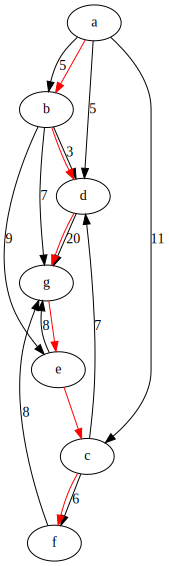

In [13]:
# 我这里画出路径吧
def show_path(lst):
    _g = graph.show()
    for i in range(len(lst)-1):
        # 
        vi_str = graph.get_vertex_name(lst[i])
        vj_str = graph.get_vertex_name(lst[i+1])
        _g.edge(vi_str,vj_str, color="red")
    return _g
# 大家可以看到'a', 'b', 'd', 'g', 'e'是可以连起来的，前面没有来 ，就只能从未选择的再选择一个了，这里是c，然后是f
show_path(DFS_graph(graph,0))
        

算法的复杂度,这里设 G=(V,E)，V是顶点的集合，E是边的集合
- 时间复杂度
   - 刚开始构造visited和DFS_seq表，时间复杂度为 O(|V|),
   - 入栈出栈操作，是对应于边的，时间复杂度为 O(|E|) 
   - 遇到一个未访问顶点时需要将其边表入栈，
      - 对于Graph对象，构造所有出边表的的总耗时是O(|V|^2) 
      - 对于GraphAL对象，这个耗时为O(|E|)
      - 显然有 $|E|\le |V|^2$ 
   - 对于Graph对象，整个遍历的时间复杂度为 O(|V|^2) 
   - 对于GraphAL对象，整个遍历的时间复杂度为 O(max(|V|,|E|))，对于稀疏矩阵，这种代价低。
- 空间复杂度
   - visited和DFS_seq表，都需要O(|V|)空间，栈的深度也不会超过顶点个数，所以算法的空间复杂度为 O(|V|)